# 1. Load the data into the pandas environment and identify some basic details of the dataset

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('employee.csv')
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [37]:
data.shape

(9, 7)

In [38]:
data.columns

Index(['name', 'age', 'income', 'gender', 'department', 'grade',
       'performance_score'],
      dtype='object')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [40]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

#### There are null values presunt in Age,Income and Gender columns 

# 2. Reset the index as "name" as the index.


In [68]:
data.set_index('name',inplace=True)
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3. Select rows for specific names Jack Morgan and Josh wills.


In [42]:
data.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”.


In [43]:
data.loc[(data['department']=='Finance') | (data['department']== 'Sales')]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


#### There are 6 employees in Sales and Finance department

# 5. Display employee who has more than 700 performance score.


In [44]:
data.loc[data['performance_score'] > 700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


#### There are 4 employees with performance score higher than 700

# 6. Display employee who has more than 500 and less than 700 performance score


In [45]:
data.loc[(data['performance_score'] > 500) & (data['performance_score'] < 700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


#### There are 4 employees with performance score in between 500 and 700

# 7. Check and handle missing values in the dataset.


In [46]:
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

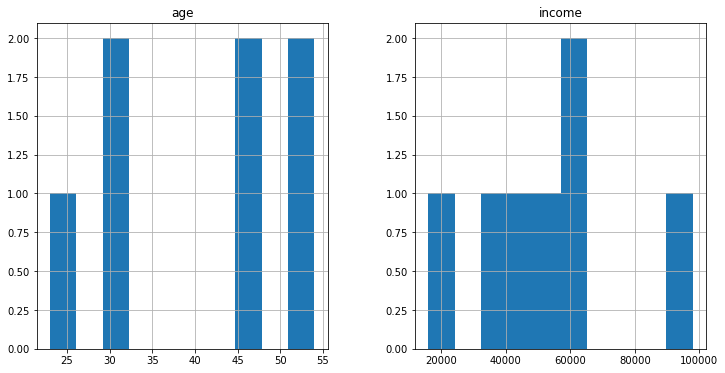

In [47]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(12,6))
plt.show()

In [65]:
data['age'].fillna(data['age'].median(),inplace=True)
data['income'].fillna(data['income'].median(),inplace=True)
data['gender'].fillna(data['gender'].mode()[0],inplace=True)

In [66]:
data.isna().sum()

name                 0
age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

In [69]:
data['age']

name
Allen Smith      45.0
S Kumar          45.0
Jack Morgan      32.0
Ying Chin        45.0
Dheeraj Patel    30.0
Satyam Sharma    45.0
James Authur     54.0
Josh Wills       54.0
Leo Duck         23.0
Name: age, dtype: float64

In [70]:
data['income']

name
Allen Smith      52000.0
S Kumar          16000.0
Jack Morgan      35000.0
Ying Chin        65000.0
Dheeraj Patel    42000.0
Satyam Sharma    62000.0
James Authur     52000.0
Josh Wills       52000.0
Leo Duck         98000.0
Name: income, dtype: float64

In [71]:
data['gender']

name
Allen Smith      F
S Kumar          F
Jack Morgan      M
Ying Chin        F
Dheeraj Patel    F
Satyam Sharma    F
James Authur     F
Josh Wills       F
Leo Duck         M
Name: gender, dtype: object

#### Since the data is not a normal distributuion, null values in Age and income columns are filled with their median values and gender column is filled with its mode. 

# 8. Check the outliers and handle outliers in performance score using Percentiles.


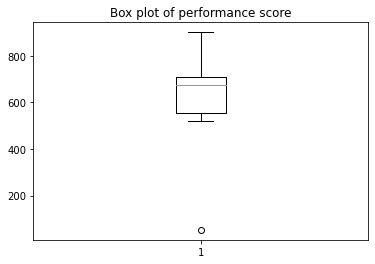

In [72]:
plt.boxplot(data['performance_score'])
plt.title('Box plot of performance score')
plt.show()

In [73]:
import numpy as np
Q1 = np.percentile(data['performance_score'], 25, interpolation='midpoint')
Q2 = np.percentile(data['performance_score'], 50, interpolation='midpoint')
Q3 = np.percentile(data['performance_score'], 75, interpolation='midpoint')

IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

print('The values below',low_lim,'and above',up_lim,'are outliers')

The values below 323.5 and above 943.5 are outliers


In [74]:
outlier = []
for x in data['performance_score']:
   if x > up_lim or x < low_lim :
    outlier.append(x)
    
print('There are', len(outlier),'outliers in performance score column.','\n')
print('Outliers are:',outlier)

There are 1 outliers in performance score column. 

Outliers are: [53]


#### -There is only one outlier present in Performance score column.
#### -There is no outliers above the upper limit.

In [75]:
ind = data['performance_score'] < low_lim
data.loc[ind].index

Index(['James Authur'], dtype='object', name='name')

In [76]:
data.drop(['James Authur'],inplace=True)

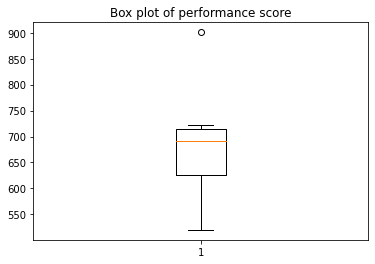

In [77]:
plt.boxplot(data['performance_score'])
plt.title('Box plot of performance score')
plt.show()

#### The row containing outlier is dropped and there is no more outliers exist in performance score column

# 9. Check the gender column and do Dummy encoding.


In [78]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [79]:
data['gender'] = pd.get_dummies(data['gender'])
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,1,Operations,G3,723
S Kumar,45.0,16000.0,1,Finance,G0,520
Jack Morgan,32.0,35000.0,0,Finance,G2,674
Ying Chin,45.0,65000.0,1,Sales,G3,556
Dheeraj Patel,30.0,42000.0,1,Operations,G2,711
Satyam Sharma,45.0,62000.0,1,Sales,G3,649
Josh Wills,54.0,52000.0,1,Finance,G3,901
Leo Duck,23.0,98000.0,0,Sales,G4,709


#### After doing the dummy encoding, Female in gender column marked as 1 and male marked as 0

# 10. Do the standard scaling on the feature performance score.

In [80]:
data.performance_score.describe()

count      8.00000
mean     680.37500
std      116.16729
min      520.00000
25%      625.75000
50%      691.50000
75%      714.00000
max      901.00000
Name: performance_score, dtype: float64

In [81]:
from sklearn import preprocessing
Standardisation = preprocessing.StandardScaler()
X = data['performance_score']
X = pd.DataFrame(X)
X = Standardisation.fit_transform(X)
X = pd.DataFrame(X)
X.columns = ['performance_score']
X.describe()

,performance_score
count,8.000000e+00
mean,4.857226e-17
std,1.069045e+00
min,-1.475872e+00
25%,-5.026938e-01
50%,1.023793e-01
75%,3.094385e-01
max,2.030331e+00


### Group 2 members
   #### 1. Abdul Vahid
   #### 2. Aparna.E.K
   #### 3. Chandni N P
   #### 4. Jibin K Joy
   #### 5. Nimisha A